In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

[시도별 전출입 인구수 분석]

- 데이터셋: 1970~2017 이동 인구 수
- 대구에서 타지역으로 이동 인구 수 분석
- 전국 이동 인구 수 분석

1. 데이터파일 확인: 컬럼명, 불필요한 행/컬럼, 결측치 확인
2. 전처리: 결측치, 이상치, 중복데이터 등 처리, 형변환(타입 일치)
3. 가공(분석하고자 하는 데이터 형태로 만들어주기): 행인덱스 처리(멀티인덱스 등), 필요한 행/컬럼 추출, 형변환(연속형 <-> 범주형)
4. 분석: 주어진 데이터를 기반으로 의미 찾기, 시각화 및 분석 결과 텍스트 요약 정리

1. 모듈, 데이터 준비

In [2]:
#1-1 모듈 로딩
import pandas as pd                # for 데이터 분석
import matplotlib.pyplot as plt    # for 시각화

In [3]:
#1-2 데이터 준비
f_data=r'/content/시도별 전출입 인구수.xlsx'

In [4]:
#1-3 data-> df
datadf=pd.read_excel(f_data,engine='openpyxl')

2. 데이터 확인: 행-컬럼 수, 실제 데이터와 컬럼 타입, 결측치 등

In [5]:
#2-1 기본 정보 확인 w. info(),describe()
datadf.info()   #행-컬럼 수, 컬럼별 결측치가 아닌 데이터 수, 데이터 타입, 메모리 사용량 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전출지별    18 non-null     object
 1   전입지별    324 non-null    object
 2   1970    325 non-null    object
 3   1971    325 non-null    object
 4   1972    325 non-null    object
 5   1973    325 non-null    object
 6   1974    325 non-null    object
 7   1975    325 non-null    object
 8   1976    325 non-null    object
 9   1977    325 non-null    object
 10  1978    325 non-null    object
 11  1979    325 non-null    object
 12  1980    325 non-null    object
 13  1981    325 non-null    object
 14  1982    325 non-null    object
 15  1983    325 non-null    object
 16  1984    322 non-null    object
 17  1985    322 non-null    object
 18  1986    322 non-null    object
 19  1987    325 non-null    object
 20  1988    325 non-null    object
 21  1989    325 non-null    object
 22  1990    325 non-null    ob

In [6]:
#2-2 기본 정보 확인 w. info(),describe()
datadf.describe(include='all')   #데이터 컬럼의 데이터 분포 확인: 고유값(값의 개수), 최빈값

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,18,324,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
unique,18,18,146,146,146,146,145,146,146,146,...,289,289,289,291,323,320,321,324,322,323
top,전국,전국,-,-,-,-,-,-,-,-,...,-,-,-,-,1489,1939,2026,1468,4303,947
freq,1,18,180,180,180,180,180,180,180,180,...,35,35,35,35,2,2,2,2,2,2


In [7]:
#2-3 실제 데이터에서 확인한 타입 비교 w. head(),tail()
datadf.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


기본 정보 확인 결과
1. 불필요한 행/컬럼:[0]행 -> 삭제
2. 결측치: '전출지별' 컬럼 -> 이전 행 값으로 채우기
3. 이상치: 행별로 '-'값이 수치값과 섞여 있음 ->

3. 데이터 전처리: 기본 정보 확인에서 파악된 내용들 처리, 자료형 일치(형변환)

In [8]:
#3-1 불필요한 데이터 처리
copydf=datadf.drop([0])
copydf

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [9]:
#3-2 결측치 데이터 처리 w.isna().sum()
copydf.isna().sum()

전출지별    306
전입지별      0
1970      0
1971      0
1972      0
1973      0
1974      0
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      3
1985      3
1986      3
1987      0
1988      0
1989      0
1990      0
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016      0
2017      0
dtype: int64

In [10]:
#3-2 '1984','1985','1986' 컬럼에서 결측치 데이터만 추출
copydf.columns

Index(['전출지별', '전입지별', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

In [11]:
a=copydf[['1984','1985','1986']].isna()
a[a.sum(axis=1)>0]

,1984,1985,1986
34,True,True,True
35,True,True,True
36,True,True,True


In [12]:
#결측치 채우기
copydf['전출지별'].ffill(inplace=True)
copydf.fillna(0,inplace=True)

In [13]:
copydf.isna().sum()

전출지별    0
전입지별    0
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
dtype: int64

In [14]:
df2=pd.DataFrame([[1,1,pd.NA],[pd.NA,pd.NA,2],[pd.NA,3,3]])
df2

,0,1,2
0,1,1,<NA>
1,<NA>,<NA>,2
2,<NA>,3,3


In [15]:
#0번 컬럼을 이전 행 값으로 채우기
df2[0].ffill(inplace=True)
df2

,0,1,2
0,1,1,<NA>
1,1,<NA>,2
2,1,3,3


In [16]:
#3-3 이상치('-') 처리
copydf.replace('-',0,inplace=True)

In [17]:
#3-4 자료형 변환
d_=dict(zip(copydf.columns[2:].to_list(),['int']*(copydf.shape[1]-2)))    #shape[1]=열 개수
copydf=copydf.astype(d_)

In [18]:
print(f'copydf.dtypes\n{copydf.dtypes}')

copydf.dtypes
전출지별    object
전입지별    object
1970     int64
1971     int64
1972     int64
1973     int64
1974     int64
1975     int64
1976     int64
1977     int64
1978     int64
1979     int64
1980     int64
1981     int64
1982     int64
1983     int64
1984     int64
1985     int64
1986     int64
1987     int64
1988     int64
1989     int64
1990     int64
1991     int64
1992     int64
1993     int64
1994     int64
1995     int64
1996     int64
1997     int64
1998     int64
1999     int64
2000     int64
2001     int64
2002     int64
2003     int64
2004     int64
2005     int64
2006     int64
2007     int64
2008     int64
2009     int64
2010     int64
2011     int64
2012     int64
2013     int64
2014     int64
2015     int64
2016     int64
2017     int64
dtype: object


4. 데이터 가공: 대구에서 전지역 전입 인구수 분석(전출지별:'대구광역시'/전입지별:'전국'제외)

In [19]:
#4-1 대구광역시 데이터만 추출
mask=(copydf['전출지별']=='대구광역시')
citydf=copydf[mask]
citydf

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
55,대구광역시,전국,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
56,대구광역시,서울특별시,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
57,대구광역시,부산광역시,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
58,대구광역시,대구광역시,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
59,대구광역시,인천광역시,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
60,대구광역시,광주광역시,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
61,대구광역시,대전광역시,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
62,대구광역시,울산광역시,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
63,대구광역시,세종특별자치시,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
64,대구광역시,경기도,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354


In [20]:
#4-2 '전출지별' 컬럼 삭제
citydf=citydf.drop('전출지별',axis=1)
#4-2 '전입지별' 컬럼 행 인덱스 설정
citydf.set_index('전입지별',inplace=True)

In [21]:
#4-3 대구광역시, 전국 행 삭제
citydf.drop(['대구광역시','전국'],inplace=True)

In [22]:
#4-4 가공데이터 확인
print(citydf.dtypes,citydf.columns,citydf.index,sep='\n\n')

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005

In [23]:
citydf

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827
경기도,0,0,0,0,0,0,0,0,0,0,...,13724,14534,14596,13320,13581,13659,12813,12322,11918,12354
강원도,0,0,0,0,0,0,0,0,0,0,...,1996,1942,2039,1843,1807,1820,1884,1884,1748,1657


5. 분석: 대구에서 전지역 전입 인구수 분석

In [24]:
#5-1 지역별 합계
citydf['합계']=citydf.sum(axis=1)
citydf

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,합계
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0,0,0,0,0,0,0,0,0,0,...,15469,13915,13310,13838,13673,13735,13038,12802,13011,638316
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5207,5050,4906,5216,5543,6157,5182,4860,4840,258658
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2003,1968,2000,1979,2202,2015,1987,1962,1930,77043
광주광역시,0,0,0,0,0,0,0,0,0,0,...,624,527,577,711,622,902,629,547,515,18531
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2057,1956,2063,2144,2219,2254,2085,1949,1978,65964
울산광역시,0,0,0,0,0,0,0,0,0,0,...,3740,3551,3586,3844,3833,3835,3675,3266,2604,78498
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,261,233,526,879,642,827,3368
경기도,0,0,0,0,0,0,0,0,0,0,...,14534,14596,13320,13581,13659,12813,12322,11918,12354,418853
강원도,0,0,0,0,0,0,0,0,0,0,...,1942,2039,1843,1807,1820,1884,1884,1748,1657,80939


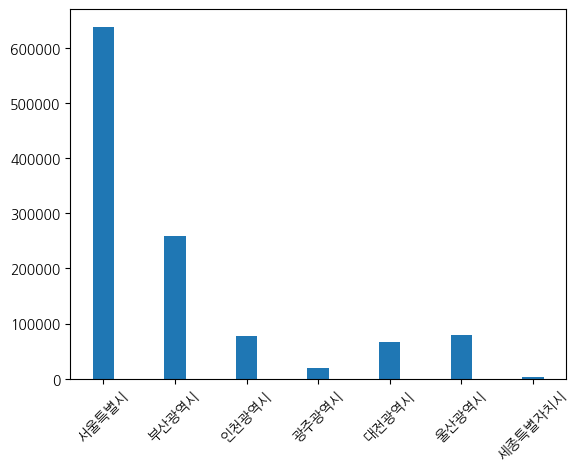

In [40]:
#5-2 막대그래프
plt.bar(citydf.index[:7],citydf['합계'][:7].values,width=0.3)
plt.xticks(rotation=45)
plt.rc('font', family='NanumGothic')
plt.show()

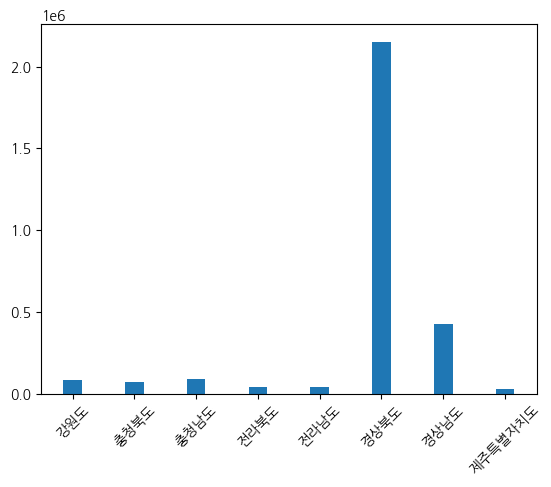

In [41]:
plt.bar(citydf.index[8:],citydf['합계'][8:].values,width=0.3)
plt.xticks(rotation=45)
plt.rc('font', family='NanumGothic')
plt.show()

In [47]:
citydf.drop('합계',axis=1,inplace=True)

In [48]:
#5-3 연도별 합계
citydf.loc['합계']=citydf.sum()
citydf

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
서울특별시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14824.0,15469.0,13915.0,13310.0,13838.0,13673.0,13735.0,13038.0,12802.0,13011.0
부산광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5066.0,5207.0,5050.0,4906.0,5216.0,5543.0,6157.0,5182.0,4860.0,4840.0
인천광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2125.0,2003.0,1968.0,2000.0,1979.0,2202.0,2015.0,1987.0,1962.0,1930.0
광주광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.0,624.0,527.0,577.0,711.0,622.0,902.0,629.0,547.0,515.0
대전광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2106.0,2057.0,1956.0,2063.0,2144.0,2219.0,2254.0,2085.0,1949.0,1978.0
울산광역시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4283.0,3740.0,3551.0,3586.0,3844.0,3833.0,3835.0,3675.0,3266.0,2604.0
세종특별자치시,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,261.0,233.0,526.0,879.0,642.0,827.0
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13724.0,14534.0,14596.0,13320.0,13581.0,13659.0,12813.0,12322.0,11918.0,12354.0
강원도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1996.0,1942.0,2039.0,1843.0,1807.0,1820.0,1884.0,1884.0,1748.0,1657.0
